# Metabolic Networks 

Metabolism, the conversion of food into energy, can be seen to function
in three stages. In the first, fats, polysaccharides and proteins are broken
down into fatty acids and glycerol, glucose and other sugars, and amino
acids. In the second stage these metabolites are largely converted
into acetyl units of acetyl CoA. In the third stage
Acetyl CoA brings acetyl into the Citric Acid Cycle. With each turn of the
cycle an acetyl group is oxidized and the associated flow of electrons is
harnessed to generate ATP, life's principal currency of energy.

We derive and solve linear programming problems stemming from flux balance 
subject to thermodynamic constraints. We derive the Simplex Method,
offer a geometric interpretation, apply it to the real problem of
succinate production and close with an investigation of
Elementary Flux Modes and Extremal Rays.

## Flux Balance and Optimal Yield

In models of metabolism the concentration of individual metabolites is
governed by the reactions in which they participate. Although metabolites
undergo significant conversion we assume that the net  *flux*  of each
metabolite is zero. In other words, nothing is lost (or gained) in its
conversion. As there are typically many more reactions than metabolites
(in  *E. Coli*  the ratio is ten to one) the modeler is typically faced 
with an underdetermined system of equilibrium equations. As such there is
typically a large class of balanced flux distributions.
Scientists and engineers have recently turned this freedom to their 
advantage by directing flow down pathways
that deliver an optimal (or at least improved) yield of a desired product.

To illustrate this we consider a network of four metabolites governed by six reactions.
 

\begin{equation}
  \eqalign{
  &\to m_0 \hskip 0.25in\hbox{at fixed rate, 1} \cr
  m_0 + 2m_1 &\to y \hskip 0.25in\hbox{at rate}\ v_0 \cr
  m_0 &\to m_1 + m_2 \hskip 0.25in\hbox{at rate}\ v_1 \cr
  m_0 + 2m_2 &\to y \hskip 0.25in\hbox{at rate}\ v_2 \cr
  y &\to 2m_2 \hskip 0.25in\hbox{at rate}\ v_3 \cr
  m_2 &\to m_1 \hskip 0.25in\hbox{at rate}\ v_4 \cr
  2m_1 &\to y \hskip 0.25in\hbox{at rate}\ v_5 \cr} \label{eq:meta1}
\end{equation}


Here we suppose that the first metabolite, $m_0$, is provided at a constant, unit, rate.
We denote by $y$ (for yield) the desired metabolite.

To balance the flux of $m_j$ we equate its 'total out' and 'total in' 
rates. Its 'total in' rate is the sum of the reaction rates in which it
appears as a reactant (on the left), while its 'total out' rate
is the sum of the reaction rates in which it
appears as a product (on the right). By this logic, the reaction scheme
(\ref{eq:meta1}) gives rise to this system of flux balances,


\begin{equation}
  \eqalign{ v_0 + v_1 + v_2 &= 1 \cr
 2v_0+2v_5 &= v_1 + v_4 \cr
 2v_2+v_4 &= v_1 + 2v_3 \cr} \label{eq:meta2}
\end{equation}


Please note that we have balanced the flux of only the first 3 metabolites,
for our goal is to in fact upset the balance of $y$ in our favor.
It is now a simple manner to translate (\ref{eq:meta2}) into the matrix
equation $Sv=f$ where


\begin{equation}
  S = \begin{bmatrix} -1 & -1 & -1 & 0 & 0 & 0 \\
                      -2 & 1 & 0 & 0 & 1 & -2 \\
                      0 & 1 & -2 & 2 & -1 & 0 \end{bmatrix} \and
  f = \begin{bmatrix}-1 \\ 0 \\ 0 \end{bmatrix}  \label{eq:meta3}
\end{equation}


and the yield to


\begin{equation}
  y = c^Tv = v_0+v_2-v_3+v_5.   \label{eq:mn2yd}
\end{equation}


We visualize this set of reactions as a directed graph whose nodes are metabolites and enzymes. 

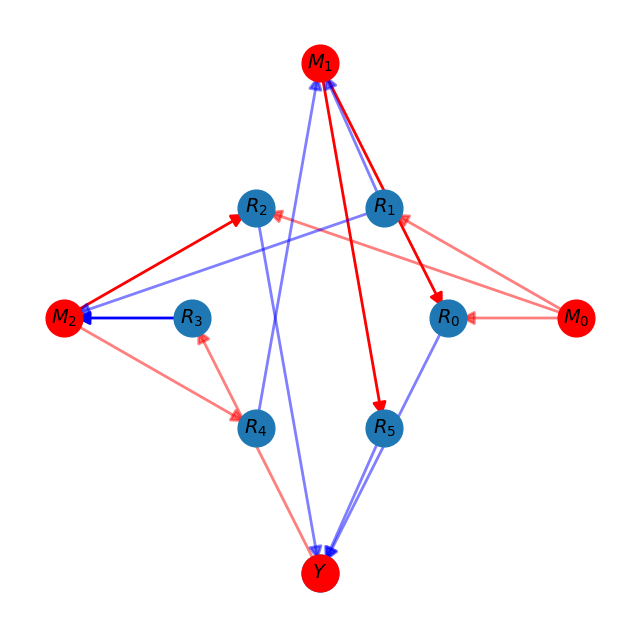

In [39]:
# Graph your stoich with yield vector
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 

def GraphStoich(S, c, E):
    
    m, n = S.shape 
    G = nx.DiGraph()
    
    fig = plt.figure(figsize=(8,8))

    for i in range(m):    # move down rows (metabolites)
        met = "$M_{"+str(i)+"}$"
        for j in range(n):  # move across columns (reactions)
            reac = "$R_{"+str(E[j])+"}$"
            w = S[i,j]
            if (w < 0):
                G.add_edge(met, reac, weight=w)
            if (w > 0):
                G.add_edge(reac, met, weight=w)

    for j in range(n):   # process the yield reactions
        reac = "$R_{"+str(E[j])+"}$"
        w = c[j]
        if (w < 0):
            G.add_edge("$Y$", reac, weight=w)
        if (w > 0):
            G.add_edge(reac, "$Y$", weight=w) 

    Mnodes = [u for (u,v) in G.nodes(data=True) if (u[1] == "M" or u[1] == "Y")]
    #pos = nx.bipartite_layout(G, nodes = Mnodes)  # positions for all nodes, with Mnodes on left
    shells = [np.setdiff1d(G.nodes, Mnodes), Mnodes]
    pos = nx.shell_layout(G, shells) #, nodes = Mnodes)  # positions for all nodes, with Mnodes on left
    #pos = nx.spring_layout(G) #, nodes = Mnodes)  # positions for all nodes, with Mnodes on left
    #pos = nx.spectral_layout(G) #, nodes = Mnodes)  # positions for all nodes, with Mnodes on left
    #pos = nx.spiral_layout(G) #, nodes = Mnodes)  # positions for all nodes, with Mnodes on left
    #pos = nx.planar_layout(G)
    
    # nodes
    Enodes = [u for (u,v) in G.nodes(data=True) if u[1] != "M"]
    nx.draw_networkx_nodes(G, pos, nodelist = Enodes, node_size=700)
    nx.draw_networkx_nodes(G, pos, nodelist = Mnodes, node_size=700, node_color='r')

    # edges
    econsumed1 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == -1]
    econsumed2 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == -2]
    eproduced1 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 1]
    eproduced2 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == 2]

    nx.draw_networkx_edges(G, pos, edgelist=econsumed1, width=2, arrowsize=20, edge_color = 'r', alpha=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=econsumed2, width=2, arrowsize=20, edge_color = 'r')
    nx.draw_networkx_edges(G, pos, edgelist=eproduced1, width=2, arrowsize=20, edge_color = 'b', alpha=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=eproduced2, width=2, arrowsize=20, edge_color = 'b')

    # labels
    nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif")

    #plt.axis('equal')
    plt.axis("off");
    
S = np.array([[-1,-1,-1,0,0,0],[-2,1,0,0,1,-2],[0,1,-2,2,-1,0]])  # our test case
c = np.array([1,0,1,-1,0,1])  # yield vector
E = np.r_[:6]   # enzyme index list
GraphStoich(S, c, E)

\begin{myfig}\label{fig:metanet}. A graphical visualization of the reaction network of (\ref{\eq:meta1}). We connect a metabolite node to an enzyme node if that metabolite appears in the reaction catalyzed by that enzyme. The direction and color of an edge indicates whether the metabolite is a reactant (red edge) or product (blue edge). The opacity of an edge is proportional to it's reaction coefficient (2 for dark, 1 for light).\end{myfig}


While flux balance has been reduced to $Sv=f$ we note that each of
our reactions is typically catalyzed by an enzyme with prescribed
reactants and products. To say that we cannot interchange these is to say
that the reaction is not reversible and this in turn implies that each
reaction rate has a sign. For the sake of definiteness we suppose each 
$v_j\ge 0$.  We may pose our design problem as


\begin{equation}
  \boxed{\max_{v\in\cP} c^Tv \where
  \cP \equiv\{v\in\maR^6:Sv=f,\ v\ge 0\}.} \label{eq:linp0}
\end{equation}


The maximization of a linear combination of variables subject to both linear
and sign constraints is called a  **Linear Programming**  problem.

## Linear Programming 

To begin, we solve $Sv = f$ via row reduction. This marks
$\{v_0,v_1,v_2\}$ as pivot variables and $\{v_3,v_4,v_5\}$ as free variables
and so permits us to write the general solution as


\begin{equation}
  \eqalign{v_0 &= (1/4) - (1/4)v_3 + (1/2)v_4 - (3/4)v_5 \cr
           v_1 &= (1/2) - (1/2)v_3 + (1/2)v_5 \cr
           v_2 &= (1/4) + (3/4)v_3 - (1/2)v_4 + (1/4)v_5. \cr} \label{eq:mn2}
\end{equation}


The associated yield is


\begin{equation}
  y = v_0+v_2-v_3+v_5 = 1/2 - (1/2)v_3 + (1/2)v_5.  \label{eq:mn2y}
\end{equation}


The easiest way to guarantee that all rates are nonnegative is to set each
of the free rates to zero. This gives us the simple starting solution


\begin{equation}
  v^{(1)} = (1/4 \ 1/2 \ 1/4 \ 0\ 0\ 0)^T    
    \hskip 0.25in\hbox{yields}\hskip 0.25in y=1/2.  \label{eq:fs2}
\end{equation}


To improve the yield we note (with respect to (\ref{eq:mn2y})) that 
increasing $v_5$ is the only good idea (for it is the only variable with a
positive weight). 
But how far can we go? We note that, with $v_3=v_4$ still zero that 
$v_0\ge 0$ requires $v_5\le (1/3)$ (and that positivity of $v_1$ and 
$v_2$ provide no upper bounds on $v_5$). Hence we set $v_5=1/3$ and $v_3=v_4=0$
in (\ref{eq:mn3}) and find 


\begin{equation}
  v^{(2)} = (0 \ 2/3 \ 1/3 \ 0\ 0\ 1/3)^T    
    \hskip 0.25in\hbox{yields}\hskip 0.25in y=2/3.  \label{eq:fs3}
\end{equation}


We can interpret the setting 
of $v_0=0$ to imply that $\{v_0,v_1,v_2\}$ was not the best choice of
pivot variables. Hence, we might be better served by a system 
that expresses the new pivot variables $\{v_1,v_2,v_5\}$ in terms of 
the new free variables $\{v_0,v_3,v_4\}$.  On rearranging (\ref{eq:mn3}) we
find that


\begin{equation}
  \eqalign{v_5 &= (1/3) - (4/3)v_0 - (1/3)v_3 + (2/3)v_4 \cr
           v_1 &= (2/3) - (2/3)v_0 - (2/3)v_3 + (1/3)v_4 \cr
           v_2 &= (1/3) - (1/3)v_0 + (2/3)v_3 - (1/3)v_4 \cr} \label{eq:mn3}
\end{equation}


is such a system. As its yield is


\begin{equation*}
  y = v_0 + v_2 - v_3 + v_5 % = v_0 + (1/3) - (1/3)v_0 + (2/3)v_3 - (1/3)v_4 - v_3 + (1/3) - (4/3)v_0 - (1/3)v_3 + (2/3)v_4 
     = (2/3) - v_0 - (2/3)v_3 + (1/3)v_4,
\end{equation*}


we naturally consider increasing $v_4$. Its only bound is $v_4\le 1$ and
at this bound (with $v_0=v_3=0$), we find 


\begin{equation}
  v^{(3)} = (0 \ 1 \ 0 \ 0\ 1\ 1)^T    
    \hskip 0.25in\hbox{yields}\hskip 0.25in y=1.  \label{eq:fs4}
\end{equation}


Returning to \fig\figref{metanet}, as the supplied flow into $m_0$ was 1
our yield cannot exceed 1, and $v^{(3)}$ is an optimal pathway. As a 
check on our calculations we might wish to confirm this algebraically.
More precisely, we express the new basic variables 
$\{v_1,v_4,v_5\}$ in terms of the new free variables $\{v_0,v_2,v_3\}$.  
On rearranging (\ref{eq:mn3}) we find


\begin{equation}
  \eqalign{v_5 &= 1 - 2v_0 - 2v_2 + v_3 \cr
           v_1 &= 1 - v_0 - v_2  \cr
           v_4 & = 1 - v_0 - 3v_2 + 2v_3 \cr} \label{eq:mn4}
\end{equation}


is such is system. As its yield


\begin{equation*}
  y = v_0+v_2-v_3+v_5 = 1 - v_0 - v_2,
\end{equation*}


has no rates with positive weights we conclude that indeed no 
further growth is possible.

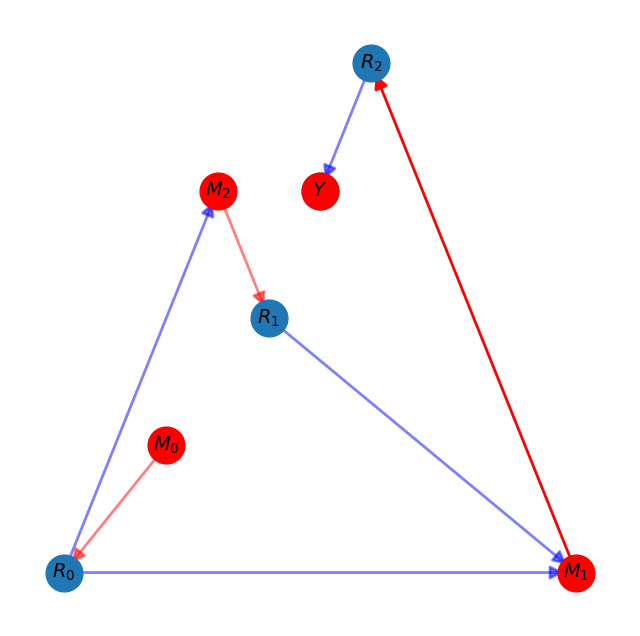

In [32]:
Eopt = [1,4,5]
Sopt = S[:,Eopt]
copt = c[Eopt]
GraphStoich(Sopt, copt, E)

\begin{myfig}\label{fig:opttest}. Optimal flow in test case. \end{myfig}

## The Simplex Method 

We now attempt to formalize these steps. 
The step from (\ref{eq:meta2}) to (\ref{eq:mn2}) begins by row reduction of $Sv=f$ 
and subsequent identification of the  **basic**, or pivot, variables indexed by $B$, and  **nonbasic**, or free, variables indexed by $N$. This permits us to express $Sv=f$ as


\begin{equation}
 S_Bv_B + S_Nv_N = f \label{eq:SBNlp}
\end{equation}


where $S_B$ corresponds to those columns of $S$ indexed by $B$ and $S_N$ corresponds to those columns of $S$ indexed by $N$ . From (\ref{eq:SBNlp}) we solve for the basic in terms of the nonbasic


\begin{equation}
  v_B = S_B^{-1} (f - S_N v_N)
    = S^{-1}_Bf - S_B^{-1}S_N v_N.
  \label{eq:vBgen}
\end{equation}



%With $b=(1,2,3)$ and $n=(4,5,6)$ this takes the form
%
%\begin{equation*}
%  \begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix} 
%  = \begin{bmatrix} 1 & 1 & 1 \\ -2 & 1 & 0 \\ 0 & 1 & -2 \end{bmatrix}
%  \bigg^{-1}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} -
%  \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & -2 \\ 2 & -1 & 0 \end{bmatrix}
%    \begin{bmatrix} v_4 \\ v_5 \\ v_6 \end{bmatrix}\right)
%\end{equation*} 
% 
%and this is precisely (\ref{eq:mn2}). With $c=(1,0,0,0,0,0)^T$
This in turn permits us to express the yield


\begin{equation*}
  y = c^Tv = c^T_Bv_B + c^T_Nv_N  
  = c^T_B S_B ^{-1} f + (c^T_N-c^T_B S_B^{-1} S_N)v_N.
\end{equation*}


%as exactly in (\ref{eq:mn2y}). 
%Setting $v_N=0$ gives us our initial
%iterate
%
%\begin{equation*}
%  v^{(1)} = (1/4,1/2,1/4,0,0,0).
%\end{equation*}
%
To increase the yield we consider


\begin{equation}
  w_i = \max\,w \where 
     w \equiv c^T_N-c^T_B S_B^{-1} S_N. \label{eq:wmax}
\end{equation}


If $w_i\le 0$ then there is no room for growth and we are done.
If however $w_i>0$ then we flex its associated free variable (with index
$j=n_i$) to
increase the yield while staying feasible. With $t$ denoting the value
of the entering free variable we stay feasible (recalling (\ref{eq:vBgen}))
so long as the new


\begin{equation}
  v_B - t S_B^{-1}s_j \ge 0, \label{eq:feas0}
\end{equation}


where $s_j$ is the $j$th column of $S$. As the yield increases with
$t$ we should choose $t$ to be the largest value for which (\ref{eq:feas0})
holds. That largest value is


\begin{equation}
  t_p = \min\,t \where t \equiv v_B/(S_B^{-1}s_j)
    \label{eq:tmin}
\end{equation} 
 

With this choice of $t$ in (\ref{eq:feas0}) we note that the $p$th element
of $v_B - t_p S_B^{-1}s_j$ is zero. As such the index $B[p]$
moves from the basic to the nonbasic set while index $N[i]$ moves in the
opposite direction and the values of the basic variables are the 
associated nonzero values of $v_B - t_p S_B^{-1}s_j$ 
at the old indices together with $t_p$ at the new index.
We have now derived the 

**Simplex Algorithm** 

1. Compute basic, $B$, and nonbasic, $N$, index sets of $S$ and set $v=v_B+v_N$ where $S_Bv_B=f$ and $v_N=0$.

2. Compute $w_i$ in (\ref{eq:wmax}).

3. If $w_i\le 0$ then $v$ produces the maximal yield, $c^T_Bv_B$, and you may stop.
Otherwise set $j=N[i]$ and compute $t_p$ in (\ref{eq:tmin}).

4. Replace $B[p]$ in $B$ with $N[i]$ and replace $N[i]$ in $N$ with $B[p]$.
The new $v_B$ is $t_p$ at the new index and the nonzero values of
 $v_B - t_p S_B^{-1}s_j$ at the old indices. Return to step 2.

We have implemented this in the python cell below

In [33]:
#  Simplex.py       
#  solve   max  c'v  subject to  Sv=f   and   v>=0        via the simplex method

import numpy as np
import scipy.linalg as la 

def Simplex(S,f,c):

    n = S.shape[1]   # number of columns of S

    P, L, U = la.lu(S) 
    B = np.nonzero(np.diag(U))[0]   #  pivot column indicies
    N = np.setdiff1d(np.r_[:n], B)  # the nonpivot indicies

    v = np.zeros(n,)          # initialize rates (keeps all nonbasic rates at zero)

    SB = S[:,B]             # the Basic part of S
    vB = la.solve(SB, f)
    v[B] = vB
    y = c[B]@vB

    print('v = ', v) 
    print('yield = ', y)

    SN = S[:,N]              # the nonbasic part of S

    w = c[N] - c[B]@la.solve(SB, SN)  # the flexible part of the yield
    val = max(w)
    i = np.argmax(w)

    iter = 0  # LP step counter as exit strategy for while loop in case of coding or model errors

    while (val > 0 and iter < 10):    # while there is room for growth, grow

        iter = iter + 1  

        j = N[i]
        z = la.solve(SB, SN[:,i])
        rat = v[B]/z
        rat[rat<0] = max(rat) + 1.0    # we want smallest positive element
        t = min(rat)
        p = np.argmin(rat)

        v[B] = v[B] - t*z
        v[j] = t

        N[i] = B[p]        # index B[p] becomes nonbasic
        B[p] = j           # index j becomes basic

        SB = S[:,B]        # repartition S
        SN = S[:,N]

        y = c[B]@v[B] # update y

        w = c[N] - c[B]@la.solve(SB, SN)  # update flexible part of y
        val = max(w)
        i = np.argmax(w)

        print('v = ', v) 
        print('yield = ', y) 
        
    return v, y
       
S = np.array([[-1,-1,-1,0,0,0],[-2,1,0,0,1,-2],[0,1,-2,2,-1,0]])  # our basic test example
f = np.array([-1, 0, 0]) 
c = np.array([1,0,1,-1,0,1])  # yield coefficients 
v, y = Simplex(S, f, c)

v =  [0.25 0.5  0.25 0.   0.   0.  ]
yield =  0.5
v =  [0.         0.66666667 0.33333333 0.         0.         0.33333333]
yield =  0.6666666666666666
v =  [0. 1. 0. 0. 1. 1.]
yield =  1.0


## Succinate Production* 

We consider a larger test example which in turn requires us to address a number of subtleties that did not arise in our small test case.

We begin with a device for translating reaction schemes to stoichiometric matrices - and illustrate its use on 
19 reactions among 16 metabolites from central metabolism.

Ssucc = 
[[-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0]
 [ 1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  0  0  1  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0]
 [ 0  0  0  0  0  1 -1 -1  0 -1  0  0  0 -1  1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0 -1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  1  0 -2  0  0 -1  0 -1  0  0  1  0  0  0]]


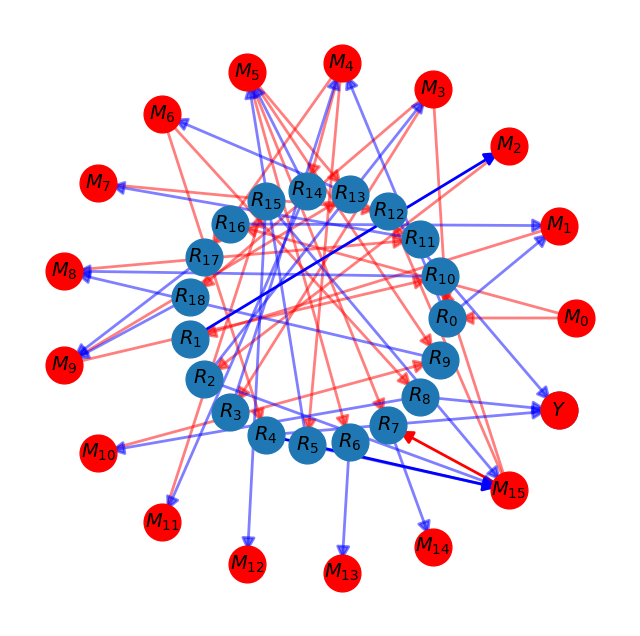

In [40]:
# GetStoich with example

def GetStoich(M,R):

    m = len(M)     # number of metabolites
    n = len(R)     # number of reactions

    S = np.zeros((m,n), dtype=int)		# initialize the stoichiometric matrix

    for i in range(m):

        met = M[i]   # metabolite i

        for j in range(n):

            reac = R[j]   # reaction j 

            ind = reac.find(met)   # find index of met in reac

            if ind > -1:         # if met is in reac tell S

               val = 1	   # nominal value

               if (ind > 0 and reac[ind-1] == '*'):  

                  val = int(reac[ind-2])      # if * preceeds met use correct val

               arrow_ind = reac.find('>')   

               if ind < arrow_ind:	

                  S[i,j] = -val	# if met = substrate then -
                 # G.add_edge(rlab, met, weight=S[i,j])

               else:

                  S[i,j] = val	# if met = product then +
                 # G.add_edge(met, rlab, weight=S[i,j])

    return S

## metabolites as a list of strings
M = ['glu',
    'g6p',
    'g3p',
	'pep', 
	'pyr', 
	'aCoA', 
	'isocit', 
	#'succ', 
	'fum', 
	'mal', 
	'oaa', 
	'glyox', 
    'form',
    'cdh',
    'ace',
    'eth',
	#'nadp',
    'nadh']

# reactions listed as a list of strings
# IMPORTANT RESERVED TOKENS are '>' and '*' and '+'

R = ['glu + pep > g6p + pyr',
     'g6p > 2*g3p',
     'g3p + nadp > pep + nadh',
     'pep > pyr',
     'isocit +2*nadp > succ +2*nadh',
     'pyr + nadp > aCoA + nadh',
     'aCoA > ace',
     'aCoA + 2*nadh > eth + hsCoA + 2*nadp',
     'isocit > glyox + succ',
     'glyox + aCoA > mal + hsCoA',
     'oaa + nadh > mal + nadp',
     'mal > fum',
     'fum + nadh > succ + nadp',
     'aCoA + oaa > isocit + CoA',
     'pyr + hsCoA > form + aCoA',
     'form + nadp > cdh + nadh',
     'glu > g6p',
     'pyr > oaa',  
     'pep > oaa']

Ssucc = GetStoich(M,R)
print('Ssucc = ')
print(Ssucc)

c = np.zeros(19,)
c[[4,8,12]] = 1
E = np.r_[:19]
GraphStoich(Ssucc, c, E)


\begin{myfig}\label{fig:succ}. The succinate reaction graph. We supply glucose (M0) and seek to maximize the yield of succinate (Y). \end{myfig}

 
<!-- \begin{equation}
S = 
\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\ 
              -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0\\ 
               0 & -2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 
               1 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\ 
              -1 & 0 & 0 & -1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0\\ 
              0 & 0 & 0 & 0 & 0 & -1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & 0 & 0\\ 
               0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0\\ 
               0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\ 
              0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 
              0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & -1 & -1\\ 
               0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 
               0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 1 & 0 & 0 & 0\\ 
               0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0\\ 
               0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 
               0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 
            0 & 0 & -1 & 0 & -2 & -1 & 0 & 2 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & -1 & 0 & 0 & 0 
\end{bmatrix}  \label{eq:Ssucc}
\end{equation}  -->


The glucose supply is encoded via


\begin{equation*}
  f = {\rm np.zeros(15,1)}, \hskip 0.25in f[0]=-1
\end{equation*}


and the succinate yield is


\begin{equation*}
  y = v_4 + v_8 + v_{12} = c^Tv \where c^T = (0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0).
\end{equation*}


Our design problem is then


\begin{equation}
  \boxed{\max\ c^Tv \hskip 0.25in\hbox{subject to}\hskip 0.25in Sv=f,
    \hskip 0.25in 0\le v\in\maR^n}. \label{eq:biglp}
\end{equation} 
 

Proceeding as above, our $S$ is 15-by-19 with a three-dimensional nullspace and even
identifying a starting point is problematic. We look for a systematic approach. Perhaps the
simplest is to augment $S$ and $v$ to


\begin{equation*}
  \hat S\equiv {\rm np.r\_[S,\ np.eye(m)]} \and \hat v\in \maR^{r+m}
\end{equation*}


and to consider the **Auxiliary Problem**


\begin{equation}
  \boxed{\max\ p^T\hat v \hskip 0.25in\hbox{subject to}\hskip 0.25in \hat S\hat v=f,
    \hskip 0.25in 0\le\hat v\in\maR^{r+m}} \label{eq:auxlp}
\end{equation} 
 

where $p$ is chosen to penalize the augmented variables,


\begin{equation*}
  p^T = {\rm np.r\_[np.zeros(r,),\ -np.ones(m,)]}.
\end{equation*}


It follows that if the maximum value of the **auxiliary** problem is zero then each of
the augmented variables must vanish and so we have a starting point for the **original** problem.
Regarding a starting point for our Auxiliary Problem (\ref{eq:auxlp}) we have given ourselves so much
elbow room that we simply choose our basic variables to be the auxiliary variables, i.e.,


\begin{equation}
  \hat B = [r+1,\ldots,r+m] \and \hat v = {\rm np.r\_[np.zeros(r,), \ f]}. \label{eq:augstart}  
\end{equation} 
 

Lets first test this approach on the small example. 

In [25]:
# SimplexAux

def SimplexAux(S,f):

    m, n = S.shape
    
    S = np.c_[S, np.eye(m)]

    B = np.r_[n:n+m]
    N = np.r_[:n]        # the nonpivot indicies
    print('B = ', B)
    c = np.r_[np.zeros(n,), -np.ones(m,)]
    v = np.r_[np.zeros(n,), f]          # initialize rates (keeps all nonbasic rates at zero)

    SB = S[:,B]             # the Basic part of S
    y = c@v   # c[B]@vB

    print('v = ', np.round(v, 2)) 
    print('yield = ', np.round(y,2))

    SN = S[:,N]              # the nonbasic part of S

    w = c[N] - c[B]@la.solve(SB, SN)  # the flexible part of the yield
    val = max(w)
    i = np.argmax(w)

    iter = 0  # LP step counter as exit strategy for while loop in case of coding or model errors

    while (val > 0 and iter < 10):    # while there is room for growth, grow

        iter = iter + 1  

        j = N[i]
        z = la.solve(SB, SN[:,i])
        rat = v[B]/z
        rat[rat<0] = max(rat) + 1
        t = min(rat)
        p = np.argmin(rat)

        v[B] = v[B] - t*z
        v[j] = t

        N[i] = B[p]        # index B[p] becomes nonbasic
        B[p] = j           # index j becomes basic
        print('B = ', B)

        SB = S[:,B]        # repartition S
        SN = S[:,N]

        y = c[B]@v[B] # update y
        w = c[N] - c[B]@la.solve(SB, SN)  # update flexible part of y
        val = max(w)
        i = np.argmax(w)

        print('v = ', np.round(v,2)) 
        print('yield = ', np.round(y)) 
        
    return v, y

# test on small example
S = np.array([[1,1,1,0,0,0],[-2,1,0,0,1,-2],[0,1,-2,2,-1,0]])  # our basic test example
f = np.array([1, 0, 0]) 
v, y = SimplexAux(S, f)

B =  [6 7 8]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [6 1 8]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [6 0 8]
v =  [-0.  0.  0.  0.  0.  0.  1.  0.  0.]
yield =  -1.0
B =  [6 1 8]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [6 0 8]
v =  [-0.  0.  0.  0.  0.  0.  1.  0.  0.]
yield =  -1.0
B =  [6 1 8]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [6 0 8]
v =  [-0.  0.  0.  0.  0.  0.  1.  0.  0.]
yield =  -1.0
B =  [6 1 8]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [6 0 8]
v =  [-0.  0.  0.  0.  0.  0.  1.  0.  0.]
yield =  -1.0
B =  [6 1 8]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [6 0 8]
v =  [-0.  0.  0.  0.  0.  0.  1.  0.  0.]
yield =  -1.0


Regarding the output of the previous cell, our basic
indices begin at $(6,7,8)$ and yield $-1$. The algorithm then exchanges 7 for 0, **without** increasing the yield. From here it
enters the never ending cycle $(6,0,8)\to(6,1,8)\to(6,0,8)$. This is a well
documented pathology for which there exist a number of remedies.

Perhaps the simplest is just to nudge $f$ a bit. To be precise we replace $f$ with 
$\tilde f$ where $\tilde f_j=f_j + 10^{-6(j+1)}$. 

In testing this on our larger problem we receive a **divide by zero** error on the dangerous line

    rat = v[B]/z
    
in SimplexAux. We have replaced this, in SimplexAuxRev with

    rat = v[B[nz]] / z[nz]
    
where nz are the indicies of the strictly positive entries in z.

In [26]:
# Test SimplexAuxRev on small and large problem
# SimplexAux

def SimplexAuxRev(S,f):

    m, n = S.shape
    f = f + (10.0)**(-6-np.r_[:m])
    
    S = np.c_[S, np.eye(m)]

    B = np.r_[n:n+m]
    N = np.r_[:n]        # the nonpivot indicies
    print('B = ', B)
    c = np.r_[np.zeros(n,), -np.ones(m,)]
    v = np.r_[np.zeros(n,), f]          # initialize rates (keeps all nonbasic rates at zero)

    SB = S[:,B]             # the Basic part of S
    y = c@v   # c[B]@vB

    print('v = ', np.round(v, 2)) 
    print('yield = ', np.round(y,2))

    SN = S[:,N]              # the nonbasic part of S

    w = c[N] - c[B]@la.solve(SB, SN)  # the flexible part of the yield
    val = max(w)
    i = np.argmax(w)

    iter = 0  # LP step counter as exit strategy for while loop in case of coding or model errors

    while (val > 0 and iter < n+1):    # while there is room for growth, grow

        iter = iter + 1  

        j = N[i]
        z = la.solve(SB, SN[:,i])
        nz = np.nonzero(z>1e-15)[0]
        rat = v[B[nz]]/z[nz]
        t = min(rat)
        p = np.argmin(rat)
        p = nz[p]

        v[B] = v[B] - t*z
        v[j] = t

        N[i] = B[p]        # index B[p] becomes nonbasic
        B[p] = j           # index j becomes basic
        print('B = ', B)

        SB = S[:,B]        # repartition S
        SN = S[:,N]

        y = c[B]@v[B] # update y
        w = c[N] - c[B]@la.solve(SB, SN)  # update flexible part of y
        val = max(w)
        i = np.argmax(w)

        print('v = ', np.round(v,2)) 
        print('yield = ', np.round(y)) 
        
    return v, y

print('Solving Aux problem for small example')
S = np.array([[1,1,1,0,0,0],[-2,1,0,0,1,-2],[0,1,-2,2,-1,0]])  # our basic test example
f = np.array([1, 0, 0]) 
v, y = SimplexAuxRev(S, f)

print(' ')

print('Solving Aux problem for large example')
f = np.zeros(16,) 
f[0] = 1
v, y = SimplexAuxRev(-Ssucc, f)

Solving Aux problem for small example
B =  [6 7 8]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [6 7 1]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [6 2 1]
v =  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
yield =  -1.0
B =  [0 2 1]
v =  [0.25 0.5  0.25 0.   0.   0.   0.   0.   0.  ]
yield =  0.0
 
Solving Aux problem for large example
B =  [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34]
v =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
yield =  -1.0
B =  [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33  7]
v =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
yield =  -1.0
B =  [19 20 21 22 23 24  4 26 27 28 29 30 31 32 33  7]
v =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
yield =  -1.0
B =  [19 20 21 22 23 24  4 26 27 13 29 30 31 32 33  7]
v =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

With regard to the output of the previous cell, our SimplexAuxRev, when applied to our small example, 
moves (without cycling) from $\hat B=[6,7,8]$ to $\hat B=[0,2,1]$ and a yield of $0$ and
a starting vector, $v=[1/4,1/2,1/4,0,0,0]$,  precisely as in (\ref{eq:fs2}).

When applying SimplexAuxRev to the large problem we encounter
yet another obstacle/nuance. Although it successfully drives the auxiliary yield to zero, its basic indices include
augmented variables! In particular


\begin{equation*}
  \hat B = [ 1,  3,  2,  0,  5, 17,  4, 12, 11, 13,  9, 30, 31, 32, 33, 10],
\end{equation*}


the offenders being $30,31,32$ and $33$. One solution is to replace them with proper
columns of $S$.

**Replacement** 

1. for each $k\ge 0$ such that $r+k\in\hat B$

2. solve $\hat S_{\hat B}^T u = e_k$ where $e_k$ is the $k$th column of 
$I_m$=np.eye(m).

3. find a $j\in N$=np.setdiff1d(np.r_[:r], Bhat) such that $s_j^T u\ne 0$. 

4. Exchange $r+k$ for $j$ in $\hat B$.

We code and test this on our larger network in the cell below, arriving at the optimal design 


\begin{equation*}
   v = [7,7,14,7,2,2,0,0,0,0,10,10,10,2,0,0,0,12,0]/7
\end{equation*}  
  

and an optimal succinate yield of 12/7. 
%and we produce no acetate, $CO_2$ and ethanol, in fact we
%do not direct any pyruvate to formate (the precursor of $CO_2$), and we do not split resources at the redundant pathways %from glucose to g6p, from pep to oaa and from isocitrate to succinate.

Small Example
y =  0.0
Phase I Complete
Bhat =  [0 2 1]
Rearrangement Complete
Bhat =  [0 2 1]
best v =  [0. 1. 0. 0. 1. 1.]
best yield =  1.0
 
Large Example
y =  -1.1109999999682655e-17
Phase I Complete
Bhat =  [ 1  3  2  0  5 17  4 12 11 13  9 30 31 32 33 10]
Rearrangement Complete
Bhat =  [ 1  3  2  0  5 17  4 12 11 13  9 14 15  6  7 10]
best v =  [1.   1.   2.   1.   0.29 0.29 0.   0.   0.   0.   1.43 1.43 1.43 0.29
 0.   0.   0.   1.71 0.  ]
best yield =  1.71
Eopt =  [ 0  1  2  3  4  5 10 11 12 13 17]


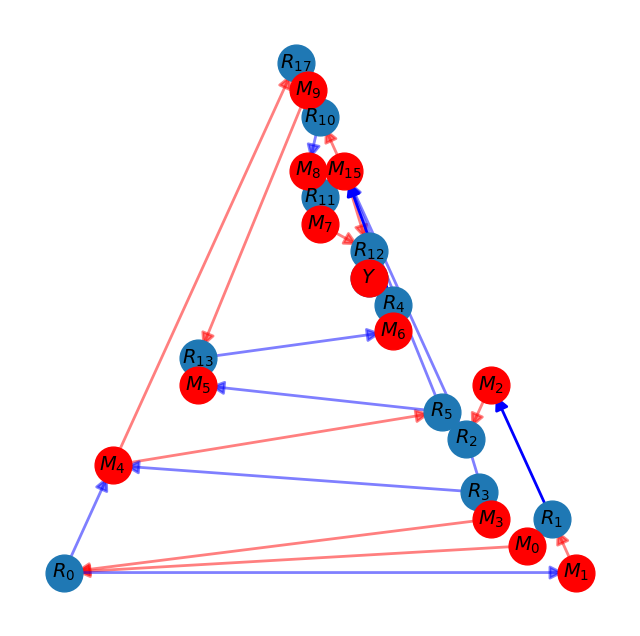

In [35]:
#  TwoPhaseRevisedSimplex.m
#  solve   max  c'v  s.t.  Sv=f and v>=0

import scipy.optimize as opt

def TwoPhaseRevisedSimplex(S,f,c):

    m, r = S.shape

    # Augment
    Im = np.eye(m)
    Shat = np.c_[S, Im]
    B = np.r_[r:r+m]

    f = f + (10.0)**(-6-np.r_[:m])   # perturb to avoid cycling
    v = np.zeros(r+m,)
    v[r:r+m] = f

    p = np.zeros(r+m,)
    p[r:r+m] = -1

    # Solve Phase I
    vhat, Bhat = RevisedSimplex(Shat, p, v, B) 
    y = p@vhat
    print('y = ', y)
    if (y < -1e-6):
        print('Phase I Failed to Find Nonaugmented Start')
        return
    print('Phase I Complete')
    print('Bhat = ', Bhat)

    # Rearrange
    iart = np.nonzero(Bhat>r-1)[0]    # r to r-1
    N = np.setdiff1d(np.r_[:r], Bhat)
    for i in range(iart.size):
        k = Bhat[iart[i]] - r
        u = la.solve(Shat[:, Bhat].T, Im[:,k])
        jj = np.nonzero(abs(S.T@u)>0)[0]
        j = min(np.intersect1d(jj, N))
        Bhat[iart[i]] = j
        N = np.setdiff1d(np.r_[:r], Bhat)

    vhat = vhat[:r]
    print('Rearrangement Complete')
    print('Bhat = ', Bhat)

    # Solve Phase II
    v, B = RevisedSimplex(S, c, vhat, Bhat)
    y = c@v

    return v, B, y

def RevisedSimplex(S,c,v,B):

    m, n = S.shape
    N = np.setdiff1d(np.r_[:n],B)

    SB = S[:,B]
    SN = S[:,N]

    y = c@v

    u = la.solve(SB.T,c[B])
    w = c[N].T - u.T@SN
    val = max(w)
    i = np.argmax(w)

    while (val > 1e-15):

        j = N[i]
        z = la.solve(SB, SN[:,i])
        nz = np.nonzero(z>1e-15)[0]
        rat = v[B[nz]]/z[nz]
        t = min(rat)
        p = np.argmin(rat)
        p = nz[p]

        v[B] = v[B] - t*z
        v[j] = t

        N[i] = B[p]
        B[p] = j
        y = c@v

        SB = S[:,B]
        SN = S[:,N]

        u = la.solve(SB.T, c[B])
        w = c[N] - u.T@SN
        val = max(w)
        i = np.argmax(w)

    return v, B

print('Small Example')
S = np.array([[1,1,1,0,0,0],[-2,1,0,0,1,-2],[0,1,-2,2,-1,0]])  # our basic test example
f = np.array([1,0,0]) 
c = np.array([1,0,1,-1,0,1])  # yield coefficients 
v, B, y = TwoPhaseRevisedSimplex(S, f, c)
print('best v = ', np.round(v, 2)) 
print('best yield = ', np.round(y, 2)) 

print(' ')

print('Large Example')
f = np.zeros(16,) 
f[0] = 1
c = np.zeros(19,)
c[[4,8,12]] = 1


v, B, y = TwoPhaseRevisedSimplex(-Ssucc, f, c)
print('best v = ', np.round(v, 2)) 
print('best yield = ', np.round(y, 2)) 

Eopt = np.nonzero(v>1e-15)[0]    #[1,4,5]
print('Eopt = ', Eopt)
Sopt = Ssucc[:,Eopt]
copt = c[Eopt]
GraphStoich(Sopt, copt, Eopt)



\begin{myfig}\label{fig:succopt}. The optimal flow to succinate. \end{myfig}


Let us finally compare our hand coded TwoPhaseRevisedSimplex with the linprog routine in the the scipy optim package.

In [36]:
# linprog test on large net
res = opt.linprog(-c, A_eq = -Ssucc, b_eq = f, method = 'revised simplex')
v = res.x
y = c@v
print('linprog result: ', res.success)
print('best v = ', np.round(v, 2))
print('best yield = ', np.round(y, 2))
print(' ')

linprog result:  True
best v =  [ 1.    1.    2.    1.    0.29  0.29 -0.   -0.    0.    0.    1.43  1.43
  1.43  0.29  0.   -0.    0.    1.71  0.  ]
best yield =  1.71
 


## Elementary Flux Modes and Extremal Rays* 

We have so far specified specific source and sink metabolites. We now embark
on the more difficult problem of achieving a minimal description of the balance
of interior metabolites. Metabolically we seek all minimal sets of enzymes
consistent with flux balance and thermodynamics. More precisely, given the
stoichiometric matrix $S$ (restricted to $m$ internal metabolites 
participating in $d$ reactions) we denote by


\begin{equation}
  \cC(S) \equiv \{v\in\maR^d:Sv=0,\ v\ge 0\} \label{eq:coneS}
\end{equation}


the set of all possible flux modes.
A flux mode $v$ is said to be elementary if there is no
other flux mode that uses a proper subset of the reactions of $v$.
In symbols, define


\begin{equation}
  z(v) = \{i:v_i=0\}.  \label{eq:zv}
\end{equation}


Then $v\in\cC(S)$ is an  **elementary flux mode**  if there does not exist
a $u\in\cC(S)$ for which $z(u)\subset z(v)$.

Let's consider a concrete example.
With respect to our first net, see \fig\figref{metanet}, the first metabolite, $m_1$,
is sourced and the balance only $m_2$ and $m_3$ is governed by the stoichiometric matrix


\begin{equation}
  S = \begin{bmatrix} 2 & -1 & 0 & 0 & -1 & 2 \\
                        0 & -1 & 2 & -2 & 1 & 0 \end{bmatrix}.
  \label{eq:Sefm1}
\end{equation}


The associated set of flux modes, $\cC(S)$, is then the intersection of 
the positive orthant in $\maR^6$
with the 4-dimensional subspace, $\N(S)$. For most, this is not an easy
set to visualize. We will see that its elementary flux modes give us 
metabolically significant
concrete basis vectors with which we may represent the entire set of flux
modes. It turns out that the $S$ of (\ref{eq:Sefm1}) has the seven 
elementary flux modes, arranged as the columns of


\begin{equation}
  R = \begin{bmatrix}
     0  &  1  &  0  &  1  &  1  &  0  &  0 \\
     0  &  2  &  2  &  0  &  1  &  0  &  1 \\
     1  &  1  &  1  &  0  &  0  &  0  &  0 \\
     1  &  0  &  0  &  1  &  0  &  1  &  0 \\
     0  &  0  &  0  &  2  &  1  &  2  &  1 \\
     0  &  0  &  1  &  0  &  0  &  1  &  1 \end{bmatrix}.
    \label{eq:Refm1}
\end{equation}


Each column is indeed a flux mode, i.e., a nonnegative member of $\N(S)$.
It is instructive to check that each is also elementary. Taking the first
column we note that it uses only reactions 3 and 4. To see that it is 
elementary we must check that no flux mode could operate on only one of
these reactions. This is clear both from the second row of $S$ as well
as from \fig\figref{metanet} - for reaction 3 or 4 alone would leave $m_3$
unbalanced.

To enumerate the elementary flux modes, as in (\ref{eq:Refm1}), 
as well as to prove
that they indeed constitute a kind of 'basis'' we translate our problem into
one of enumerating the extremal rays in a pointed polyhedral cone.
%, a problem solved by the Double Description procedure of Motzkin et al. 

To begin, from the $m\times d$ stoichiometric matrix $S$ we build
the $(d+2m)\times d$ matrix


\begin{equation}
  A = \begin{bmatrix} I_d \\ S \\ -S \end{bmatrix} \label{eq:ADD}
\end{equation}


and note that


\begin{equation}
  \cC(A) \equiv \{v\in\maR^d:Av\ge 0\} \label{eq:conedef}
\end{equation}


is precisely the set $\cC(S)$ of flux modes in (\ref{eq:coneS}).
There is a rich geometric language (and theory) associated to such objects.
We call the members of $\cC(A)$  **rays**  because if $v\in\cC(A)$
then so is $av$ for every $a\ge 0$.
%A vector $r$ is said to be a  **ray**  of $\cC(A)$ if $r\ne 0$ and 
%$ar\in\cC(A)$ 
%for all $a\ge 0$.
%We identify two rays $r_1$ and $r_2$ if $r_1=ar_2$ for some $a>0$.
%We shall denote this equivalence by $r_1\sim r_2$. 
If $K$ is a set of row indices and $A_K$ denotes the associated rows of
$A$ then 


\begin{equation}
  \cF_K \equiv \{v\in \cC(A):A_Kv=0\} \label{eq:faceK}
\end{equation}


is called a **face** of $\cC(A)$. The **dimension** of a face is its number of
linearly independent rays. A face of dimension 1 is called an **extreme ray** of $\cC(A)$.
Two extreme rays of $\cC(A)$ are said to be **adjacent** if they span a two-dimensional face of $\cC(A)$. 





The fact that $A'$ and $R'$ independently fully determine the same
cone has lead to the name  **double description**  for the pair $(A,R)$.
In what follows we describe a procedure for building $R$ from $A$
for $A$ of the form (\ref{eq:ADD}).

For any vector $v\in\cC(A)$  we define the zero set with respect to $A$ as
the indices of the rows of $A$ that are orthogonal to $v$. That is


\begin{equation}
  \zeta(v) = \{i:A_iv=0\}. \label{eq:zia}
\end{equation}


This notation allows us to prove

\begin{proposition}\label{prop:bioc0} $\cF_{\zeta(r)}$ is the smallest face
in $\cC(A)$ containing $r$.
\end{proposition}

**Proof:** As $A_{\zeta(r)}r = 0$ we see that $\cF_{\zeta(r)}$ is a face containing $r$. 
If $\cF_K$ is a face containing $r$ then $A_Kr = 0$ and so 
$K\subset \zeta(r)$ and so $\cF_{\zeta(r)}\subset \cF_K$. **End of Proof.**

\begin{proposition}\label{prop:bioc1}  If $r$ is a ray of $\cC(A)$
and $\rank(A_{\zeta(r)})=d-k$ then

 (a) $\rank(A_{\zeta(r)\cup\{i\}})=d-k+1$ for each $i\not\in \zeta(r)$.

 (b) $\dim(\cF_{\zeta(r)})=k$. 

 (c) If $k\ge 2$ then $r$ is a nonnegative combination of two
distinct rays $r_1$ and $r_2$ with $\rank(A_{\zeta(r_i)})>d-k$ for $i=1,2$.
\end{proposition}

**Proof:** (a) We must show that $A_i\not\in\span(A_{\zeta(r)})$. But this follows
from $A_ir\ne 0$ and $A_{\zeta(r)}r=0$.

(b) As $\dim(\N(A_{\zeta(r)}))=k$ it contains $k$ linearly independent vectors, say 
$r, v_2, v_3,\ldots v_k$. We now turn these into rays. Set
$r_1\equiv r$, $r_i \equiv r + a_iv_i$, $i = 2,\ldots k$. 
These vectors are linearly independent so long as each $a_i\ne 0$. 
If $v_i\in\cC(A)$ set $a_i=1$. Otherwise choose $a_i$ to guarantee
$A_jr+a_iA_jv_i\ge 0$ for each $j$. Note that

\begin{equation*}
  0 < a_i \le \min_j\{-A_jr/A_jv_i: A_jv_i < 0\}
\end{equation*}

suffices.  The $k$ vectors $r_i$, $i = 1,\ldots,k$
are linearly independent rays in $\cF_{\zeta(r)}$.

(c) If $k \ge 2$ then there exist $i$ and $j$ such that 
$\rank(A_{\zeta(r)\cup\{i,j\}})=\rank(A_{\zeta(r)})+2$. 
Hence $A_j\not\in\span(A_{\zeta(r)\cup\{i\}})$ it follows from the Fundamental Theorem of Linear Algebra that 
$A_j$ is not orthogonal to $\N(A_{\zeta(r)\cup\{i\}})$ and so there exists 
$u_1\in \N(A_{\zeta(r)\cup\{i\}})$ such that $A_ju_1\ne 0$. Without loss
we can assume that $A_ju_1 > 0$. By construction we also note that
$A_iu_1=0$. By the same reasoning there exists a
$u_2\in \N(A_{\zeta(r)\cup\{j\}})$ such that $A_iu_2<0$ and
$A_ju_2=0$.

Now $v \equiv u_1+u_2$ satisfies 
$A_iv<0$ and $A_jv > 0$. 
Let $r_1 \equiv r+a_1v$ and $r_2\equiv r-a_2v$ with


\begin{equation}
  a_1 = \min_m\{-A_mr/A_mv: A_mv < 0\} \and
  %a_1 = -(A_ir)/(A_iv) \and a_2 = (A_jr)/(A_jv).
  a_2 = \min_n\{A_nr/A_nv: A_nv > 0\}.  \label{eq:bestas}
\end{equation} 
 

By construction these are both strictly positive and the resulting $r_1$ and
$r_2$ both lie in $\cF_{\zeta(r)}$ and clearly


\begin{equation*}
  r = \frac{a_2}{a_1+a_2}r_1 + \frac{a_1}{a_1+a_2}r_2
\end{equation*}


is a positive combination of two rays. 
Finally, we denote by the $m_1$ and $n_2$ the idiocies at
which the respective minima are attained in (\ref{eq:bestas}). 
As $A_{m_1}r_1=A_{n_2}r_2=0$ it follows $\zeta(r)$
is strictly contained in $\zeta(r_1)$ and $\zeta(r_2)$ and so
$\N(A_{\zeta(r_1)})$ and $\N(A_{\zeta(r_2)})$ both have dimensions strictly larger
than $k$. **End of Proof.**



\begin{proposition}\label{prop:bioc2} Suppose that $r$ is a ray of $\cC(A)$.

 (a) If $r$ is a nonnegative combination of rays of $\cC(A)$, say
 

\begin{equation}
  r = \sum_j\la_jr_j, \hskip 0.25in \la_j>0   \label{eq:posraysum}
\end{equation}


then each $r_j\in\N(A_{\zeta(r)})$.

 (b) $r$ is extreme iff $\rank(A_{\zeta(r)})=d-1$.

 (c) $r$ is a nonnegative combination of extreme rays of $\cC(A)$.

\end{proposition}


**Proof:** (a), We have already noted that $r\in\N(A_{\zeta(r)})$ hence applying 
$A_{\zeta(r)}$ to each side of (\ref{eq:posraysum}) brings


\begin{equation*}
   0 = \sum_j\la_jA_{\zeta(r)}r_j.
\end{equation*}


but as each term in the sum is nonnegative it follows that each term is in fact zero.

(b), If $\rank(A_{\zeta(r)}) = d-1$ , then $\N(A_{\zeta(r)})=\{ar:a\in\maR\}$ 
and so $\cF_{\zeta(r)}$ is a one-dimensional face spanned by $r$. That is,
$r$ is extreme.
To prove the converse we prove its contrapositive.
If $\rank(A_{\zeta(r)})<d-1$ then by Prop.~\procref{bioc1}(b) then
$\dim(\cF_{\zeta(r)})>1$ and so $r$ is not extremal.

(c), If $r$ is not extreme then $\dim(\N(A_{\zeta(r)}))=k>1$ and so, by
Prop.~\procref{bioc1}(c),
$r=a_1r_1+a_2r_2$ where $r_1$ and $r_2$ obey 
$\dim(\N(A_{\zeta(r_i)}))<\dim\N((A_{\zeta(r)}))$. If $k=2$ we are done.
If not apply this same reasoning to $r_1$ and $r_2$ (and their
descendants) until one-dimensional null spaces are achieved.  **End of Proof.**



Since every extreme ray is certainly necessary to generate 
$\cC(A)$ we have the following 



\begin{corollary}\label{cor:bioc3} Let $R$ be a minimal generating 
matrix of $\cC(A)$. Then $R$ is the set of extreme rays of $\cC(A)$.
\end{corollary}



%Two distinct extreme rays $r_1$ and $r_2$ of $\cC(A)$ are said to be
% **adjacent**  if the minimal face of $\cC(A)$ containing both contains no 
%other extreme rays. This is equivalent to say that, if $r_3$ is an extreme 
%ray of $\cC(A)$ for which $\zeta(r_3)\supseteq \zeta(r_1) \cap \zeta(r_2)$, then either
%$r_3 =r_1$ or $r_3=r_2$.

Our final step is to establish a rank test for adjacency.



\begin{proposition}\label{prop:bioc4} Let $r_1$ and $r_2$ be 
distinct extremal rays of $\cC(A)$. 
They are adjacent iff
$\rank(A_{\zeta(r_1)\cap \zeta(r_2)})=d-2$.
\end{proposition}

% (c) if $r_3$ is a ray with $\zeta(r_3)\supset \zeta(r_1)\cap \zeta(r_2)$ then 
%either $r_3 \simr_1$ or $r_3\simr_2$.

**Proof:** Let $r_1$ and $r_2$ be distinct rays of $\cC(A)$. Then
$\cF_{\zeta(r_1)\cap \zeta(r_2)}$ is the minimal face 
of $\cC(A)$ containing $r_1$ and $r_2$.
To prove the equivalence of (a) and (b) let $r_1$ and $r_2$ be extreme 
rays of $\cC(A)$.  Since $\cC(A)$ is pointed, we have $\zeta(r_1)\ne \zeta(r_2)$.

We prove that (a) implies (b). If $r_1$ and $r_2$ are adjacent then they
span a two-dimensional face. As $\cF_{\zeta(r_1)\cap \zeta(r_2)}$ is the smallest
such face it follows that $\dim(\N(A_{\zeta(r_1)\cap \zeta(r_2)}))\le 2$. 
But, as  $\N(A_{\zeta(r_1)\cap \zeta(r_2)})$ contains the two distinct one
dimensional spaces, $\N(A_{\zeta(r_1)})$ and $\N(A_{\zeta(r_2)})$, it
follows that  $\dim(\N(A_{\zeta(r_1)\cap \zeta(r_2)}))\ge 2$.

We prove that (b) implies (a). If $\dim(\N(A_{\zeta(r_1)\cap \zeta(r_2)}))=2$ 
then $r_1$ and $r_2$ generate $\cF_{\zeta(r_1)\cap \zeta(r_2)}$, that is, each 
such $\bx$ can be written 
$\bx  = a_1r_1+a_2r_2$. To secure the signs of $a_1$ and $a_2$ note that if
$i\in \zeta(r_2)\setminus \zeta(r_1)$ then


\begin{equation*}
  A_i\bx = a_1A_ir_1+a_2A_ir_2 = a_1A_ir_1.
\end{equation*}


From the positivity of $A_i\bx$ and $A_ir_1$ comes the positivity of $a_1$.
To show that $a_2>0$ repeat this argument with $j\in \zeta(r_1)\setminus \zeta(r_2)$.
As $r_1$ and $r_2$ span a two-dimensional face they are adjacent.
<!-- \if 1=0
%Observe also that, since a two dimensional face contains at least two 
%extreme rays by Proposition \secref{bioc}.2 it contains exactly two 
%extreme rays.
%We next prove that not(b) implies not(a).
%If $\rank(A_{\zeta(r_1)\cap \zeta(r_2)})=d-k$ with 
%$k>3$ then by Prop.~\secref{bioc}.1(b) $\dim(F)=k$ and at least $k$ 
%extreme rays are necessary to generate $F$ by Prop.~\secref{bioc}.2(b). 
%Thus $r_1$ and $r_2$ are not adjacent.
We now use the former equivalence to prove (a) iff (c).
If (a) holds, then $\rank(A_{\zeta(r_1)\cap \zeta(r_2)})=d-2$. 
It follows from Prop.~\procref{bioc1}(a) that if
$\zeta(r_3)\supset \zeta(r_1)\cap \zeta(r_2)$ then $\rank(A_{\zeta(r_3)})=d-1$, 
i.e., $r_3$ is an extreme ray by Prop.~\procref{bioc2}(b). 
Furthermore, $\zeta(r_3)\supset \zeta(r_1)\cap \zeta(r_2)$ implies that 
$A_{\zeta(r_1)\cap \zeta(r_2)}r_3=0$ and so $r_3\in\cF_{\zeta(r_1)\cap \zeta(r_2)}$.
All this (together with the assumed adjacency in (a)) implies that $r_3$ 
is an extremal ray lying in the minimal
face spanned by $r_1$ and $r_2$, and so $r_3$ must be equivalent to
either $r_1$ or $r_2$.

If (a) does not hold, that is, either $r_1$ and $r_2$ are nonadjacent 
or at least one is not an extreme ray. Then if 
$\rank(A_{\zeta(r_1)\cap \zeta(r_2)})=d-2$ there exist
in $F$ at least one extreme ray different from $r_1$ and $r_2$, 
which can serve as $r_3$. If $\rank(A_{\zeta(r_1)\cap \zeta(r_2)})=d-2$ 
then we know from (b) that $r_1$ or $r_2$ is nonextreme
and that $F$ contains two extreme rays, thus at least one of these extreme 
rays is different from $r_1$ and $r_2$ and can serve as $r_3$, 
showing the invalidity of (c).
\fi -->
**End of Proof.**



%The newly introduced inequality $A_iv \ge 0$ 
%partitions $\maR^d$ into three
%parts:
%%
%%\begin{equation*}
% \cA^0_i=\{v\in\maR^d:A_iv = 0\}, \and
%% \cA_i^\pm =\{v\in\maR^d:\pmA_iv > 0\}
%\end{equation*}
%
%The intersection of $H_i^0$ with $\cC(A)$ and the new extreme points $i$ and 
%$j$ in the cut section C are shown in bold in Fig 
%that in turn 
%partition the columns of $R$ via
%If $J$ is the number of column indices $R$. The rays $r_j$ $(j\in J)$ are 
%then partitioned into three parts accordingly:
%
%\begin{equation*}
% J^0=\{j:A_ir_j=0\}, \hskip 0.25in
% J^+=\{j:A_ir_j>0\} \and
% J^-=\{j:A_ir_j<0\}.
%\end{equation*}
%
%We call the rays indexed by $J^+$, $J^0$, $J^-$ the positive, 
%zero, negative rays %with respect to $i$, respectively. 
%To construct a matrix $R'$ from $R$ we 
%generate new $|J^+|\times|J^-|$ rays lying on the $i$th hyperplane $H_i^0$
%by taking an appropriate positive
%combination of each positive ray $r_j$ and each negative ray 
%$r_j'$ and by discarding all negative rays.

\begin{proposition}\label{prop:bioc4} Let $(A_K,R)$ be a DD pair 
such that $\rank(A_K) = d$ and $R$ is minimal. Select a row index, $i$, of 
$A$ not in $K$.
The new inequality $A_iv \ge 0$ partitions the columns of $R$ via


\begin{equation*}
 R^+ = \{r_j:A_ir_j>0\}, \hskip 0.25in R^0 = \{r_j:A_ir_j=0\} \and
 R^- = \{r_j:A_ir_j<0\}.
\end{equation*}


Retain the vectors in the first two sets for the updated


\begin{equation*}
  \tilde R = [R^+\ R^0]
\end{equation*}


and whenever $r^+\in R^+$ and $r^-\in R^-$ are adjacent append


\begin{equation}
  \tilde r = (A_ir^+)r^- - (A_ir^-)r^+  \label{eq:tilbr}
\end{equation}


to $\tilde R$.  Then $(A_{K\cup\{i\}},\tilde R)$ is a DD pair and $\tilde R$
is minimal.
\end{proposition}
% where $R'$ is 
%the $d\times|J'|$ matrix with column vectors $r_j$ $(j\in J')$,  defined by
%
%\begin{equation*}
%  \eqalign{ J' &= J^+\cup J^0\cup Adj, \cr
%    Adj &= \{(j^+,j^-)\in J^+\times J^-: r_{j}^+\ \hbox{and}\ r_{j}^- 
%       \ \hbox{are adjacent in}\ \cC(A_K)\}, \cr
%    r'_j &= (A_ir_j^+)r_{j}^- - (A_ir_{j}^-)r_j^+\ \hbox{for each}
%    \ (j^+,j^-)\in Adj \cr}
%\end{equation*}
%
%Furthermore, if $R$ is a minimal generating matrix for $\cC(A_K)$ then 
%$R'$ is a minimal generating matrix for $\cC(A_{K\cup\{i\}})$.




**Proof:** We know from \prop\procref{bioc2} that each extreme ray 
of $\cC(A_K)$ must belong to $R$, and that only the extreme rays 
of $\cC(A_{K\cup\{i\}})$ are necessary in $\tilde R$. 
For $r^\pm\in R^\pm$ set $W \equiv \zeta(r^+)\cap \zeta(r^-)\cap K$ 
and define $\tilde r$ as in (\ref{eq:tilbr}).
Note that 
$\zeta(\tilde r)\cap (K\cup\{i\}) = W\cup\{i\}$.
If $r^\pm$ are adjacent extreme rays of $\cC(A_K)$, then 
$\rank(A_W)=d-2$. Then, by Prop.~\procref{bioc1}(a), 
$\rank(A_{\zeta(\tilde r)\cap(K\cup\{i\})}) = d-1$. Thus 
$\tilde r$ is an extreme ray of $\cC(A_{K\cup\{i\}})$ and 
must belong to $\tilde R$.

Suppose $r^\pm$ are not adjacent extreme rays. 
If $\rank(A_W)<d-2$ we
get $\rank(A_{\zeta(\tilde r)\cap(K\cup\{i\})})< d-1$ and so $\tilde r$ 
is not an extremal ray in $\cC(A_{K\cup\{i\}})$. 
If rather $\rank(A_W) = d-2$, then we know from 
Prop.~\procref{bioc4} that $r^\pm$ cannot be both 
extreme rays of $\cC(A_K)$. But they belong to a two dimensional face 
containing exactly two extreme rays of $\cC(A_K)$ which thus belong 
to $R$: This adjacent pair will then produce a new ray equal to 
$\tilde r$, so $\tilde r$ is not necessary.
Hence all new rays are extreme rays of $\cC(A_{K\cup\{i\}})$ and 
$\tilde R$ is minimal. **End of Proof.**

I have coded this procedure in the cell below . When run on the $S$ of
(\ref{eq:Sefm1}) we get the $R$ of (\ref{eq:Refm1})

When run on the $S$ of (\ref{eq:Ssucc}) without 
rows 1 (glu), 14(CO2), 15(ace) and 16(eth) we get


Elementary Flux Modes are columns of
[[0. 2. 0. 2. 4. 0. 0.]
 [0. 4. 4. 0. 4. 0. 4.]
 [2. 2. 2. 0. 0. 0. 0.]
 [2. 0. 0. 2. 0. 2. 0.]
 [0. 0. 0. 4. 4. 4. 4.]
 [0. 0. 2. 0. 0. 2. 4.]]
[[ 1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  0  0  1  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0]
 [ 0  0  0  0  0  1 -1 -1  0 -1  0  0  0 -1  1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0 -1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 

NetworkXException: G is not planar.

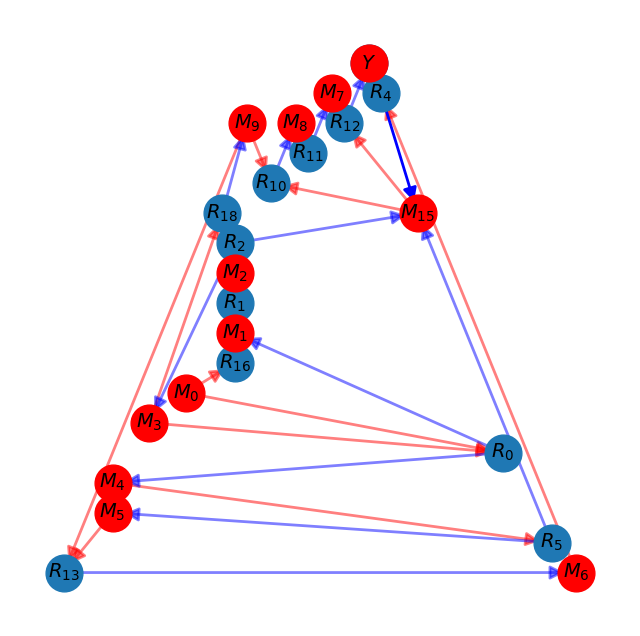

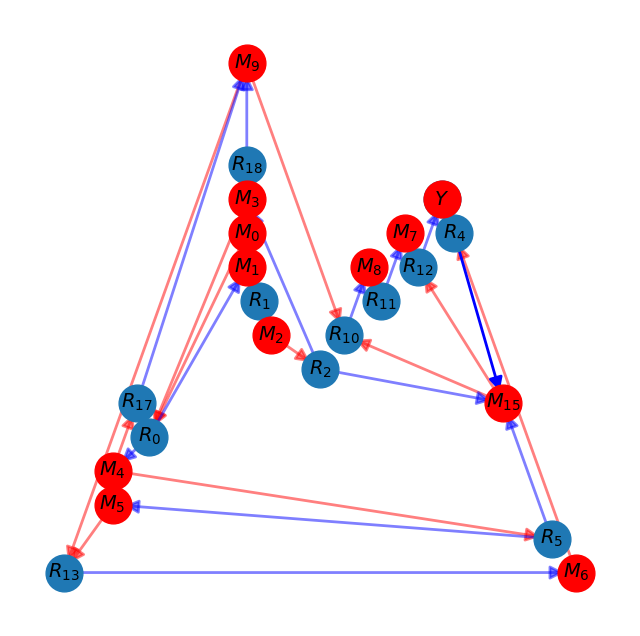

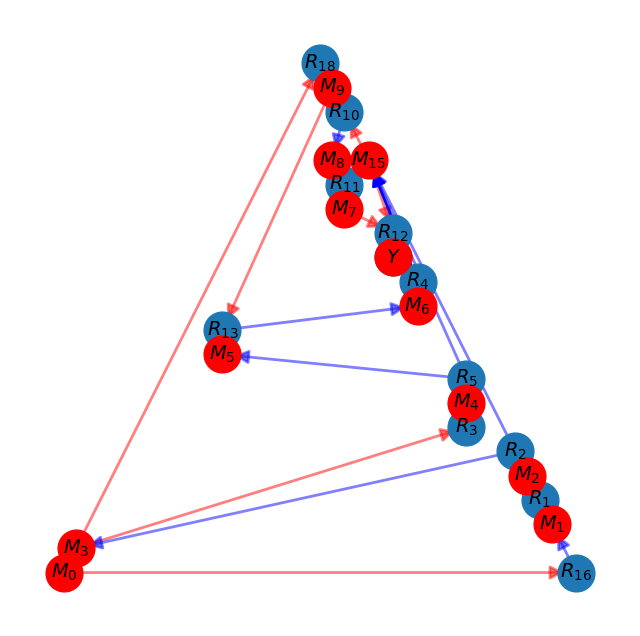

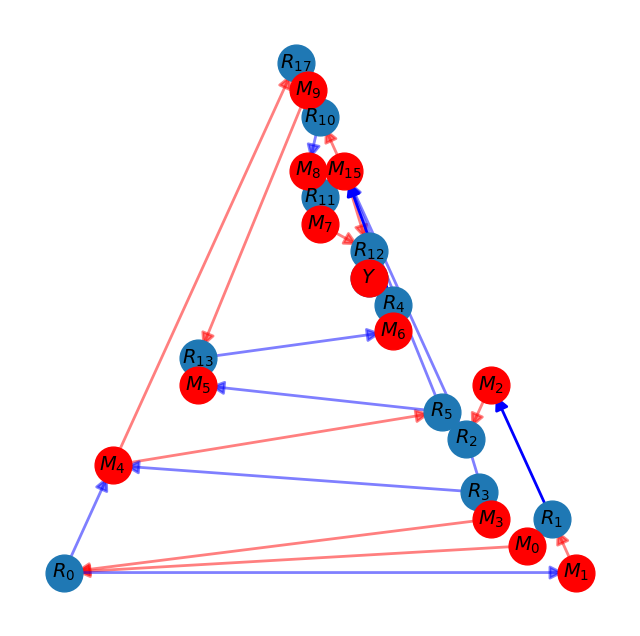

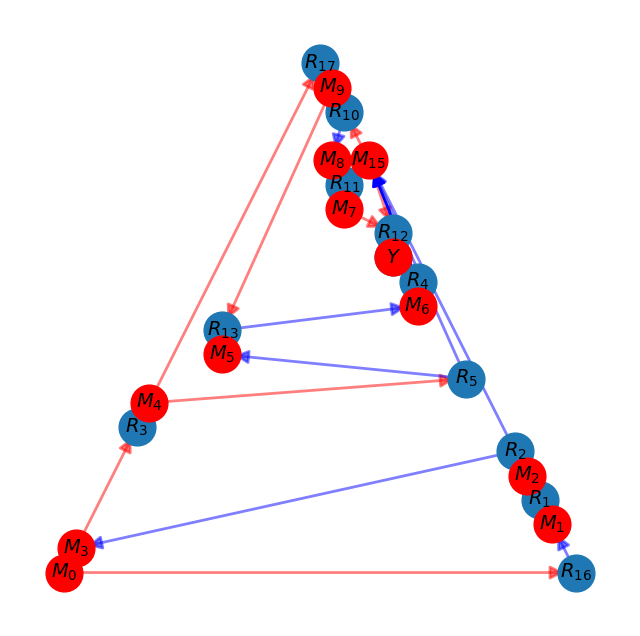

<Figure size 800x800 with 0 Axes>

In [37]:
#  efm.py         
#
#  Find the Elementary Flux Modes of a Metabolic Network
#  using the Double Description Procedure of Fukuda and Prodon
#
#   usage:    R = efm(S)
#       where  S   is the given stoichiomentric matrix,
#       and the columns of R are the elementary flux modes
#
#   example:    R = efm([[2, -1, 0, 0, -1, 2],[0, -1, 2, -2, 1, 0]])
#

def efm(S):

    m, d = S.shape
    I = np.eye(d)
    A = np.r_[I, S, -S]   # row stack
    R = np.eye(d)         # initial R
    AK = np.eye(d)
    tol = 1e-16

    for i in range(d,d+2*m):   # remainder of row indicies of A

        jnk, J = R.shape        # partition columns of R
        Jp = np.zeros(1,dtype=int)        # initialize
        Jm = np.zeros(1,dtype=int)
        J0 = np.zeros(1,dtype=int)

        for j in range(J):       # =1:J,
            val = A[i,:] @ R[:,j]        # A(i,:)*R(:,j)
            if val > tol:
                Jp = np.r_[Jp, j]    # row augmentation
            elif val > -tol: 
                J0 = np.r_[J0, j]
            else:
                Jm = np.r_[Jm, j]

        Jp = Jp[1:]   # strip off leading 0
        J0 = J0[1:]
        Jm = Jm[1:]

        sJp = Jp.size
        sJm = Jm.size
        Rnew = np.c_[R[:,Jp], R[:,J0]]   # easy columns of Rnew

        for jp in range(sJp):     # 1:sJp,    # find adjancents via rank test
            for jm in range(sJm):    # =1:sJm,

                rjp = R[:, Jp[jp]]
                rjm = R[:, Jm[jm]]
                zrp = np.nonzero(abs(AK@rjp) < tol)
                zrm = np.nonzero(abs(AK@rjm) < tol)
                zboth = np.intersect1d(zrp,zrm)
                r = np.linalg.matrix_rank(AK[zboth,:])
                if r == d-2: 
                    rnew = (A[i,:]@rjp)*rjm - (A[i,:]@rjm)*rjp
                    Rnew = np.c_[Rnew, rnew]

        R = Rnew
        AK = np.r_[AK, [A[i,:]]]

    return R

S = np.array([[2, -1, 0, 0, -1, 2],[0, -1, 2, -2, 1, 0]])  # our test case
R = efm(S)
print('Elementary Flux Modes are columns of')
print(R)

Sefm = Ssucc[1:,:]
print(Sefm)
R = efm(Sefm)
print('Elementary Flux Modes are columns of')


c = np.zeros(19,)
c[[4,8,12]] = 1
Nefm = R.shape[1]
for j in range(Nefm):
    glubal = R[0,j] + R[16,j]
    R[:,j] = R[:,j]/glubal
    print(np.round(R[:,j],2))
    print('yield = ', np.round(c@R[:,j],2))
    Eopt = np.nonzero(R[:,j]>1e-15)[0]    
    #print('Eopt = ', Eopt)
    Sopt = Ssucc[:,Eopt]
    copt = c[Eopt]
    GraphStoich(Sopt, copt, Eopt)

\begin{myfig}\label{fig:succefm} The ten Elementary Flux Modes for our large net. Each delivers the optimal yield. \end{myfig}



## Notes and Exercises 

For a general introduction to Metabolic Engineering 

    GN Stephanopoulos AA Aristidou, J. & Nielsen, Metabolic Engineering: Principles and Methodologies, Academic Press, 1998

For Linear Programming we have followed

    Chvatal, V., Linear Programming, WH Freeman, 1983
    
Our large example is drawn from

    Cox SJ, Shalel Levanon S, Sanchez A, Lin H, Peercy B, Bennett GN, San KY. Development of a metabolic network design and optimization framework incorporating implementation constraints: a succinate production case study. Metab Eng. 2006 Jan;8(1):46-57. doi: 10.1016/j.ymben.2005.09.006. Epub 2005 Nov 2. PMID: 16263313.
    
Our presentation of the Double Desription method for capturing Extremal Rays follows 

    Fukuda K., Prodon A. (1996) Double description method revisited. In: Deza M., Euler R., Manoussakis I. (eds) Combinatorics and Computer Science. CCS 1995. Lecture Notes in Computer Science, vol 1120. Springer, Berlin, Heidelberg. https://doi.org/10.1007/3-540-61576-8_77
    


\begin{exercise}\label{ex:twoDex} Solve $\max\,v_1$ subject to $v_1+v_2=1$, $v_1\ge 0$ and $v_2\ge 0$
by graphing the constraints and seeing the largest $v_1$.
\end{exercise}

\begin{exercise}\label{ex:scost} This leaves us then to solve the two
linear systems


\begin{equation*}
  S_b z = s_j \and S^T_bu = c.
\end{equation*}


We naturally use the lu factorization $S_b = LU$ to conclude that


\begin{equation*}
  z = U\backslash(L\backslash s_j)  \and
  u = L^T\backslash(U^T\backslash c).
\end{equation*} 
 
\end{exercise}

\begin{exercise}\label{ex:succvar} Anaerobic Succinate network. \end{exercise}

\begin{exercise}\label{ex:bioccyc} We consider the cycling reported in the last section for


\begin{equation}
  \widehat S = \begin{bmatrix} 
                      1 & 1 & 1 & 0 & 0 & 0 & 1 & 0 & 0\\
                      2 & -1 & 0 & 0 & -1 & 2 & 0 & 1 & 0\\
                      0 & -1 & 2 & -2 & 1 & 0 & 0 & 0 & 1 \end{bmatrix} \and
  f = \begin{bmatrix}1 \\ 0 \\ 0 \end{bmatrix}  \label{eq:cyc1}
\end{equation}


and $c^T = (0,0,0,0,0,0,-1,-1,-1)^T$ and


\begin{equation*}
  \widehat b = (7,8,9) \and \widehat v^*_{\widehat b} = f
  \and \widehat S_{\widehat b} = I_3.
\end{equation*}


(a) Execute one iteration of the Simplex Algorithm by hand. 
In particular, show that \eq(\ref{eq:wmax}) brings


\begin{equation*}
  w = (3,-1,3,-2,0,2,1,1,1).
\end{equation*}


and argue why column 1 will now become basic. To find the departing column
show that \eq(\ref{eq:feas0}) asks for the least nonnegative $t$ for which


\begin{equation}
  \begin{bmatrix}1 \\ 0 \\ 0 \end{bmatrix} - t
  \begin{bmatrix}1 \\ 2 \\ 0 \end{bmatrix} \ge 0, \label{eq:cyc2}
\end{equation}


and so conclude that $t=0$ is the desired value. As this is forced
by the second element in \eq(\ref{eq:cyc2}) conclude that the second
index of $\widehat b$ must leave and conclude that
$\widehat b=(7,1,9)$. Argue that as $t=0$ this step will not increase the
yield. % As such we call such a step  **degenerate** . 

(b) Now reflect on our
remedy. In particular, note that if the column on the left in \eq(\ref{eq:cyc2})
was actually $(1+\eps;\eps^2;\eps^3)$ for some small $\eps$ then the least
nonnegative $t$ would be $\eps^2/2$ and that the yield increase accordingly.
\end{exercise}

\begin{exercise}\label{ex:rearrange} Lets establish the validity of each of the 
 **Replacement Algorithm** .

(a) If $S$ is full rank then there exists a nonbasic column of $S$ which is not
orthogonal to $r$.

(b) Show that after each replacement that $\widehat S_{\widehat b}$ remains 
invertible. Hint: Let $S_1$ and $S_2$ denote $\widehat S_{\widehat b}$ before
and after replacement of $\be_k$ with $s_j$. Prove that $S_2=S_1\bE$ where $\bE$
is the identity matrix except for its $k$th column is $S_1^{-1}s_j$. As $S_1$ is
invertible prove that $S_2$ is invertible if $\bE$ is invertible.
Argue that $\bE$ is invertible if the $k$th element of $S_1^{-1}s_j$ is nonzero.
Finally argue that this element is precisely $s_j^Tr$, which was shown in (a) above
to be nonzero.
\end{exercise}

\begin{exercise}\label{ex:ineqlp} This device of augmentation also applies nicely to the larger class
of problems with linear  **inequalities** . For example, the inequality $v_1+v_2\le f_1$
can be handled by introducing a new variable, $v_3$, and requiring that both
$v_1+v_2+v_3=f_1$ and $v_3\ge 0$.

(a) Use this idea to transform $\max\,v_1$ subject to $v_1+v_2\le 1$, $v_1-v_2\le 0$,
$v_1\ge 0$ and $v_2\ge 0$ into an equality constrained problem. 
Note that \eq(\ref{eq:augstart}) is indeed a basic feasible solution.
Proceed to solve it by hand by the simplex method. Confirm your answer by graphically
solving the original problem.

(b) Adapt  *TwoPhaseSimplex.m*   to solve the mixed problem


\begin{equation*}
  \max\,c^Tv,\hskip 0.25in\hbox{subject to}\hskip 0.25in Sv = b, \hskip 0.25in Av\le\bd, \hskip 0.25in v\ge 0.
\end{equation*}

\end{exercise}